In [113]:
import numpy as np
import pandas as pd
import tabulate
import matplotlib.pyplot as plt
import pickle, random
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [114]:
with open('./data/train.pkl','rb') as f:
    data = pickle.load(f)
with open('./data/test.pkl','rb') as f:
    test = pickle.load(f)

In [115]:
random.shuffle(data)
# print(data)

# Preprocess

## Training Set

In [116]:
X_train = data[:,0]
X_train = np.split(X_train,10)
X_train = [ [[j] for j in i] for i in X_train ]
# print(X_train)
y_train = data[:,1]
y_train = np.split(y_train,10)
# print(y_train)

In [117]:
X_vec_train = {}
for i in range(1,21):
    X_vec_train["degree " + str(i)] = []
    for j in range(10):
        X_vec_train["degree " + str(i)].append(PolynomialFeatures(i).fit_transform(X_train[j]))
# print(X_vec_train)

## Testing Set

In [118]:
X_test = test[:,0]
X_test = [ [i] for i in X_test ]
y_test = test[:,1]

In [119]:
X_vec_test = {}
for i in range(1,21):
    X_vec_test["degree " + str(i)] = PolynomialFeatures(i).fit_transform(X_test)

## Train Models

In [120]:
Models = {}
for i in range(1,21):
    Models["degree " + str(i)] = []
    for j in range(10):
        Models["degree " + str(i)].append(LinearRegression().fit(X_vec_train["degree " + str(i)][j], y_train[j]))

## Predictions

In [121]:
f_cap_x = {}
for i in range(1,21):
    f_cap_x["degree " + str(i)] = []
    for j in range(10):
        f_cap_x["degree " + str(i)].append( Models["degree " + str(i)][j].predict(X_vec_test["degree " + str(i)]) )
    f_cap_x["degree " + str(i)] = np.array(f_cap_x["degree " + str(i)])

### Variance

In [122]:
Variance = np.zeros(20)

In [123]:
for idx, degree in enumerate(f_cap_x):
    data = np.array(f_cap_x[degree])
    Variance[idx] = np.mean(np.var(data, axis=0))

In [124]:
avg_f_cap_x = {}
for i in f_cap_x:
    avg_f_cap_x[i] = []
    for j in range(len(f_cap_x[i][0])):
        avg_f_cap_x[i].append( np.mean( f_cap_x[i][:,j] ) )

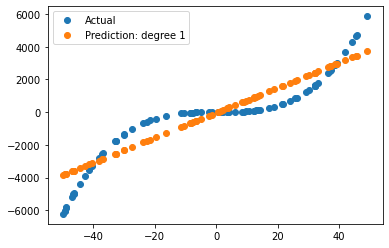

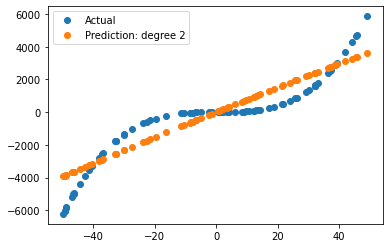

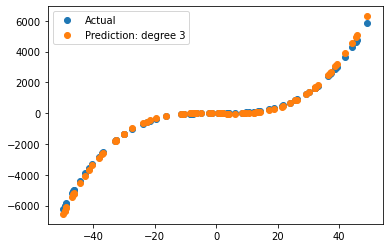

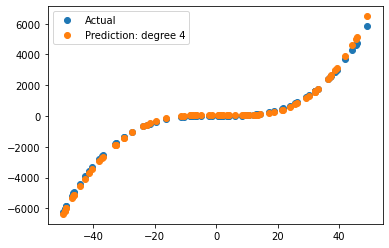

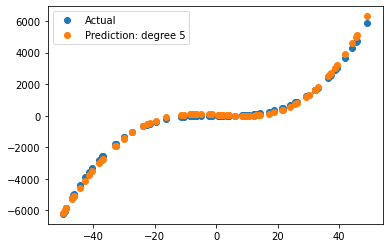

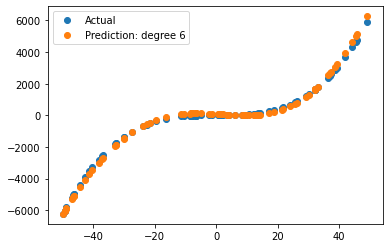

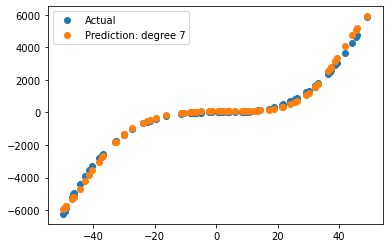

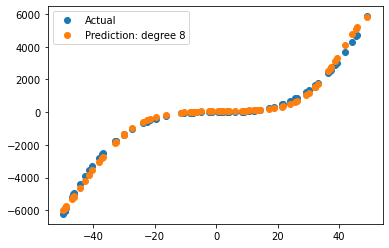

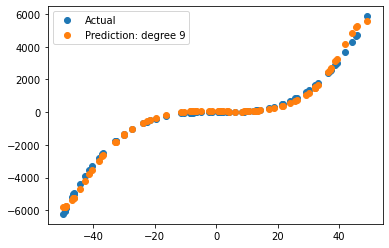

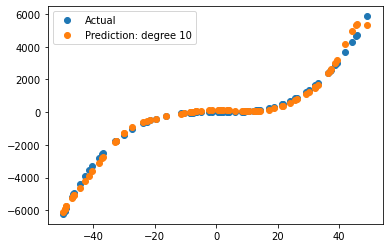

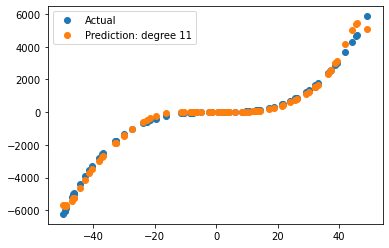

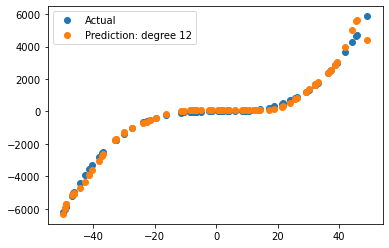

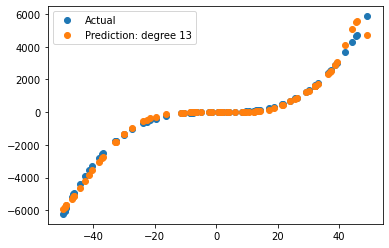

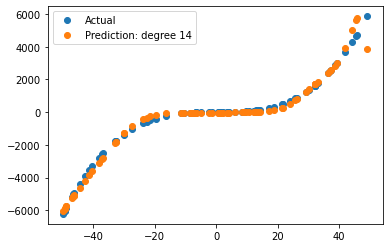

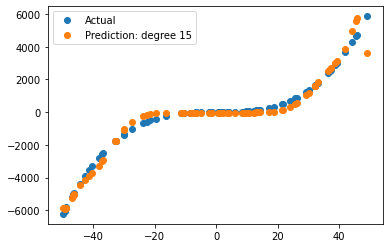

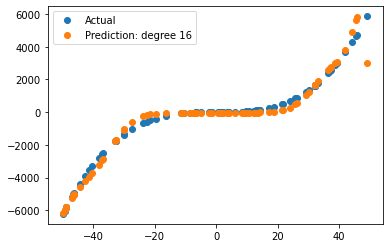

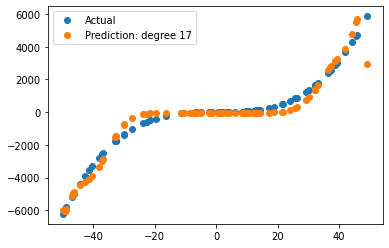

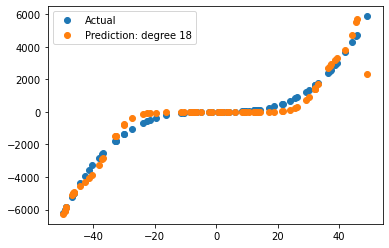

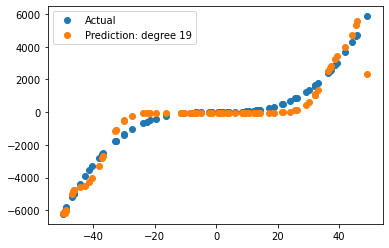

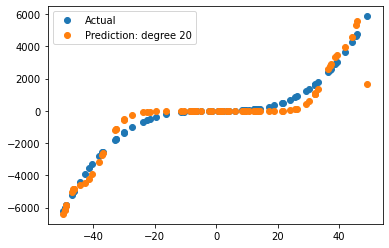

In [125]:
for i in avg_f_cap_x:
    plt.plot( X_test, y_test, "o", label="Actual")
    plt.plot( X_test, avg_f_cap_x[i], "o", label="Prediction: " + i)
    plt.legend()
    plt.show()

### Bias

In [126]:
Bias_2 = np.zeros(20)
Bias = np.zeros(20)

### Error

In [127]:
mse = np.zeros(20)

In [128]:
for idx, degree in enumerate(f_cap_x):
    data = np.array(f_cap_x[degree])
    Bias[idx] = np.mean(abs(np.mean(data, axis = 0) - y_test))
    Bias_2[idx] = np.mean((np.mean(data, axis = 0) - y_test) ** 2)
    
    for i in data:
        mse[idx] += np.mean(np.square(i - y_test))
mse /= 10

## Irreducible Error

In [129]:
irr_err = np.zeros(20)

In [130]:
irr_err = mse - Variance - Bias_2

## Plots

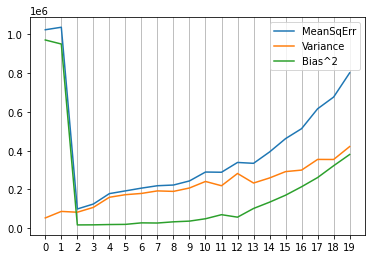

In [131]:
plt.plot(mse, label="MeanSqErr")
plt.plot(Variance, label="Variance")
plt.plot(Bias_2, label="Bias^2")
plt.xticks(range(0, 20))
plt.grid(axis='x')
plt.legend()

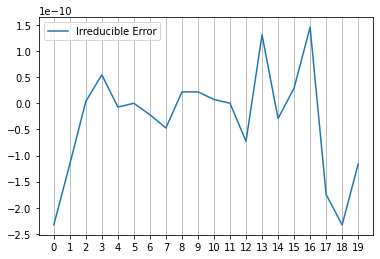

In [132]:
plt.plot(irr_err, label="Irreducible Error")
plt.xticks(range(0, 20))
plt.grid(axis='x')
plt.legend()

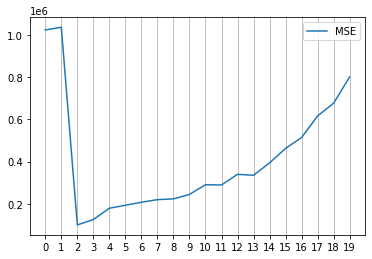

In [133]:
plt.plot(mse, label="MSE")
plt.xticks(range(0, 20))
plt.grid(axis='x')
plt.legend()

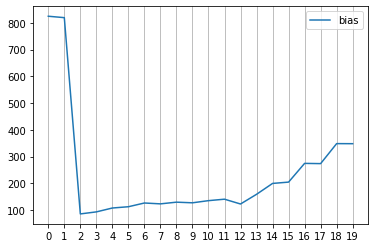

In [134]:
plt.plot(Bias, label="bias")
plt.xticks(range(0, 20))
plt.grid(axis='x')
plt.legend()

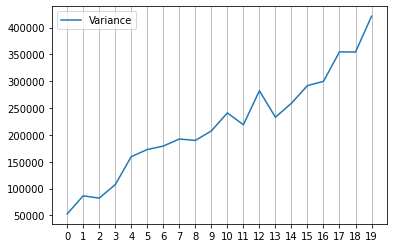

In [135]:
plt.plot(Variance, label="Variance")
plt.xticks(range(0, 20))
plt.grid(axis='x')
plt.legend()

## Tabulation

In [136]:
table = pd.DataFrame({
    "degree": range(1, 21),
    "bias": Bias,
    "variance": Variance
})

In [137]:
table.to_markdown("lol.md")

In [138]:
table

degree        bias       variance
0        1  824.739869   52840.180277
1        2  819.506303   86565.484062
2        3   85.963110   82300.340654
3        4   93.550872  107361.629304
4        5  108.024464  159562.465321
5        6  112.818601  172848.255601
6        7  126.745280  179279.424513
7        8  123.538564  192446.104814
8        9  129.873622  189855.025105
9       10  127.500906  207424.228392
10      11  135.551244  241132.078319
11      12  141.000309  219039.417009
12      13  123.012644  282350.684626
13      14  159.245255  233032.107660
14      15  199.906364  259190.398421
15      16  204.851204  291999.539161
16      17  274.821994  299835.940251
17      18  273.928455  354913.443732
18      19  348.708871  354524.644882
19      20  348.400846  421273.448095

In [139]:
irr_tab = pd.DataFrame({
    "degree": range(1, 21),
    "Irreducible Error": irr_err
})

In [140]:
irr_tab

degree  Irreducible Error
0        1      -2.328306e-10
1        2      -1.164153e-10
2        3       3.637979e-12
3        4       5.456968e-11
4        5      -7.275958e-12
5        6       0.000000e+00
6        7      -2.182787e-11
7        8      -4.729372e-11
8        9       2.182787e-11
9       10       2.182787e-11
10      11       7.275958e-12
11      12       0.000000e+00
12      13      -7.275958e-11
13      14       1.309672e-10
14      15      -2.910383e-11
15      16       2.910383e-11
16      17       1.455192e-10
17      18      -1.746230e-10
18      19      -2.328306e-10
19      20      -1.164153e-10